# Convert Z-stach tiff files to Ome.tiff Format 

In [30]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import tifffile
from tifffile import imread
from matplotlib.backends.backend_pdf import PdfPages
import glob, os, re

from aicsimageio import AICSImage, imread, writers
from skimage import color, io

0.31379148412693075 0.05766397389069454


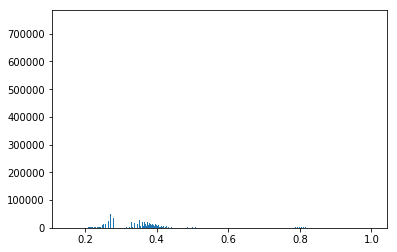

In [31]:
# trying to convert Moffit Stack to ome-TIFF format similar to Allen cells
#files = glob.glob('/home/gpu-user/data/4xMoffit/*.tif')
files = glob.glob('nci-n87/*.tif')
z_indicator = '_z(\d\d)'
regex_z = re.compile(z_indicator)

def sort_key(file):
    return regex_z.search(file).group(1)

files.sort(key=sort_key)
data_array = np.expand_dims(np.stack([color.rgb2gray(tifffile.imread(file)) for file in files]), axis=0) # stack all the sorted tiffiles and expand dim to create a "channel dim"
# z-score normalize array.

print(data_array.mean(),data_array.std())
_ = plt.hist(np.ravel(data_array), bins='auto')

In [32]:
with writers.ome_tiff_writer.OmeTiffWriter("nci-n87/testMoffitOme.ome.tif", overwrite_file=True) as writer:
    writer.save(data_array, dimension_order="CZYX", channel_names=['brightfield']) 

In [36]:
test_image = AICSImage('nci-n87/testMoffitOme.ome.tif')
arr2 = test_image.get_image_data()
arr2.shape
#np.delete(arr2, 0, 0)

(1, 1, 1, 23, 1024, 1024)

In [68]:
im_image = np.squeeze(np.squeeze(np.squeeze(arr2, axis=0),axis=1),axis=0)
im_image.shape
#plt.imshow(im_image)

(23, 1024, 1024)

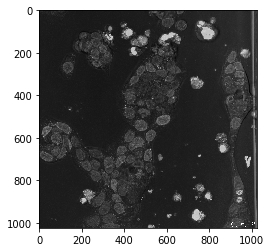

In [69]:
plt.imshow(np.max(im_image,axis=0), cmap='gray')